<h1>ML Assignment</h1>

<h2>Install</h2>

In [ ]:
#!pip install matplotlib
#!pip install wordcloud
#!pip install scattertext
#!pip install textblob
#!pip install networkx

<h2>Import</h2>

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from nltk.sentiment import SentimentIntensityAnalyzer

from gensim.models import Word2Vec
import gensim
import warnings
 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

import collections

import string
import re

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from textblob import TextBlob
from scipy.stats import kde
import networkx as nx

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

nltk.download('wordnet')
nltk.download('vader_lexicon')
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tqz11\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tqz11\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from datetime import datetime
from collections.abc import Iterable

<h2>Input data</h2>

In [5]:
header = ["target", "id", "date", "flag", "user", "text"]

# Read the CSV file with specified column names
df = pd.read_csv("X_dataset.csv", encoding="ISO-8859-1", names=header)

In [6]:
df.head()

target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [7]:
# selecting target and features
normal = df[["target","text"]]
data_Neg = df[(df["target"] == 0)]["text"]
data_Pos = df[(df["target"] == 4)]["text"]

In [8]:
normal.info()
print("\n")
data_Neg.info()
print("\n")
data_Pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


<class 'pandas.core.series.Series'>
Int64Index: 800000 entries, 0 to 799999
Series name: text
Non-Null Count   Dtype 
--------------   ----- 
800000 non-null  object
dtypes: object(1)
memory usage: 12.2+ MB


<class 'pandas.core.series.Series'>
Int64Index: 800000 entries, 800000 to 1599999
Series name: text
Non-Null Count   Dtype 
--------------   ----- 
800000 non-null  object
dtypes: object(1)
memory usage: 12.2+ MB


In [9]:
print(normal.shape)
print(data_Neg.shape)
print(data_Pos.shape)

(1600000, 2)
(800000,)
(800000,)


In [10]:
normal["text"] = normal["text"].str.lower()
data_Neg=data_Neg.str.lower()
data_Pos=data_Pos.str.lower()

C:\Users\tqz11\AppData\Local\Temp\ipykernel_41484\3594627933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal["text"] = normal["text"].str.lower()


In [11]:
normal.head()

target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - awww, t...
1       0  is upset that he can't update his facebook by ...
2       0  @kenichan i dived many times for the ball. man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....

In [12]:
data_Neg.head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [13]:
data_Pos.head()

800000         i love @health4uandpets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @darealsunisakim thanks for the twitter add, s...
800003    being sick can be really cheap when it hurts t...
800004      @lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

<h2>Remove Email</h2>

In [14]:
def cleaning_email(df):
    return re.sub('@[^\s]+', ' ', df)

In [15]:
normal["text"] = normal["text"].apply(lambda x: cleaning_email(x))
data_Neg= data_Neg.apply(lambda x: cleaning_email(x))
data_Pos= data_Pos.apply(lambda x: cleaning_email(x))

C:\Users\tqz11\AppData\Local\Temp\ipykernel_41484\3576090650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal["text"] = normal["text"].apply(lambda x: cleaning_email(x))


In [16]:
normal.head()

target                                               text
0       0    http://twitpic.com/2y1zl - awww, that's a bu...
1       0  is upset that he can't update his facebook by ...
2       0    i dived many times for the ball. managed to ...
3       0    my whole body feels itchy and like its on fire 
4       0    no, it's not behaving at all. i'm mad. why a...

In [17]:
data_Neg.head()

0      http://twitpic.com/2y1zl - awww, that's a bu...
1    is upset that he can't update his facebook by ...
2      i dived many times for the ball. managed to ...
3      my whole body feels itchy and like its on fire 
4      no, it's not behaving at all. i'm mad. why a...
Name: text, dtype: object

In [18]:
data_Pos.head()

800000                        i love   u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002      thanks for the twitter add, sunisa! i got to...
800003    being sick can be really cheap when it hurts t...
800004                      he has that effect on everyone 
Name: text, dtype: object

<h2>Remove URL</h2>

In [19]:
def cleaning_URLs(df):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',df)

In [20]:
normal["text"] = normal["text"].apply(lambda x: cleaning_URLs(x))
data_Neg = data_Neg.apply(lambda x: cleaning_URLs(x))
data_Pos = data_Pos.apply(lambda x: cleaning_URLs(x))

C:\Users\tqz11\AppData\Local\Temp\ipykernel_41484\3956468416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal["text"] = normal["text"].apply(lambda x: cleaning_URLs(x))


In [21]:
normal.head()

target                                               text
0       0      - awww, that's a bummer.  you shoulda got ...
1       0  is upset that he can't update his facebook by ...
2       0    i dived many times for the ball. managed to ...
3       0    my whole body feels itchy and like its on fire 
4       0    no, it's not behaving at all. i'm mad. why a...

In [22]:
data_Neg.head()

0        - awww, that's a bummer.  you shoulda got ...
1    is upset that he can't update his facebook by ...
2      i dived many times for the ball. managed to ...
3      my whole body feels itchy and like its on fire 
4      no, it's not behaving at all. i'm mad. why a...
Name: text, dtype: object

In [23]:
data_Pos.head()

800000                        i love   u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002      thanks for the twitter add, sunisa! i got to...
800003    being sick can be really cheap when it hurts t...
800004                      he has that effect on everyone 
Name: text, dtype: object

<h2>Punctuation</h2>

In [24]:
english_punctuations = string.punctuation
english_punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def cleaning_punctuations(text):
    translator = str.maketrans('', '', english_punctuations)
    return text.translate(translator)

<h2>Remove Punctuation</h2>

In [26]:
normal["text"] = normal["text"].apply(lambda text: cleaning_punctuations(text))
data_Neg = data_Neg.apply(lambda text: cleaning_punctuations(text))
data_Pos = data_Pos.apply(lambda text: cleaning_punctuations(text))

C:\Users\tqz11\AppData\Local\Temp\ipykernel_41484\3458388978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal["text"] = normal["text"].apply(lambda text: cleaning_punctuations(text))


In [27]:
normal.head()

target                                               text
0       0       awww thats a bummer  you shoulda got davi...
1       0  is upset that he cant update his facebook by t...
2       0    i dived many times for the ball managed to s...
3       0    my whole body feels itchy and like its on fire 
4       0    no its not behaving at all im mad why am i h...

In [28]:
data_Neg.head()

0         awww thats a bummer  you shoulda got davi...
1    is upset that he cant update his facebook by t...
2      i dived many times for the ball managed to s...
3      my whole body feels itchy and like its on fire 
4      no its not behaving at all im mad why am i h...
Name: text, dtype: object

In [29]:
data_Pos.head()

800000                          i love   u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002      thanks for the twitter add sunisa i got to m...
800003    being sick can be really cheap when it hurts t...
800004                      he has that effect on everyone 
Name: text, dtype: object

<h2>Remove Numbers</h2>

In [30]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [31]:
normal["text"] = normal["text"].apply(lambda x: cleaning_numbers(x))
data_Neg = data_Neg.apply(lambda x: cleaning_numbers(x))
data_Pos = data_Pos.apply(lambda x: cleaning_numbers(x))

C:\Users\tqz11\AppData\Local\Temp\ipykernel_41484\2122964149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal["text"] = normal["text"].apply(lambda x: cleaning_numbers(x))


In [32]:
normal.head()

target                                               text
0       0       awww thats a bummer  you shoulda got davi...
1       0  is upset that he cant update his facebook by t...
2       0    i dived many times for the ball managed to s...
3       0    my whole body feels itchy and like its on fire 
4       0    no its not behaving at all im mad why am i h...

In [33]:
data_Neg.head()

0         awww thats a bummer  you shoulda got davi...
1    is upset that he cant update his facebook by t...
2      i dived many times for the ball managed to s...
3      my whole body feels itchy and like its on fire 
4      no its not behaving at all im mad why am i h...
Name: text, dtype: object

In [34]:
data_Pos.head()

800000                          i love   u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002      thanks for the twitter add sunisa i got to m...
800003    being sick can be really cheap when it hurts t...
800004                      he has that effect on everyone 
Name: text, dtype: object

<h2>Sampel Stopwords</h2>

In [35]:
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

<h2>Remove Stop Words</h2>

In [36]:
STOPWORDS = set(stopwords_list)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [37]:
normal["text"] = normal["text"].apply(lambda text: cleaning_stopwords(text))
data_Neg = data_Neg.apply(lambda text: cleaning_stopwords(text))
data_Pos = data_Pos.apply(lambda text: cleaning_stopwords(text))

C:\Users\tqz11\AppData\Local\Temp\ipykernel_41484\1335407238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal["text"] = normal["text"].apply(lambda text: cleaning_stopwords(text))


In [38]:
normal.head()

target                                               text
0       0  awww thats bummer shoulda got david carr third...
1       0  upset cant update facebook texting might cry r...
2       0  dived many times ball managed save rest go bounds
3       0                   whole body feels itchy like fire
4       0                           behaving im mad cant see

In [39]:
data_Neg.head()

0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                             behaving im mad cant see
Name: text, dtype: object

In [40]:
data_Pos.head()

800000                                   love u guys r best
800001    im meeting one besties tonight cant wait girl ...
800002    thanks twitter add sunisa got meet hin show dc...
800003    sick really cheap hurts much eat real food plu...
800004                                      effect everyone
Name: text, dtype: object

<h2>Tokenization</h2>


In [41]:
tokenizer = RegexpTokenizer(r'\w+')
normal["text"] = normal["text"].apply(tokenizer.tokenize)
data_Neg = data_Neg.apply(tokenizer.tokenize)
data_Pos = data_Pos.apply(tokenizer.tokenize)

C:\Users\tqz11\AppData\Local\Temp\ipykernel_41484\1104615079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal["text"] = normal["text"].apply(tokenizer.tokenize)


In [42]:
normal.head()

target                                               text
0       0  [awww, thats, bummer, shoulda, got, david, car...
1       0  [upset, cant, update, facebook, texting, might...
2       0  [dived, many, times, ball, managed, save, rest...
3       0            [whole, body, feels, itchy, like, fire]
4       0                     [behaving, im, mad, cant, see]

In [43]:
data_Neg.head()

0    [awww, thats, bummer, shoulda, got, david, car...
1    [upset, cant, update, facebook, texting, might...
2    [dived, many, times, ball, managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4                       [behaving, im, mad, cant, see]
Name: text, dtype: object

In [44]:
data_Pos.head()

800000                             [love, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [thanks, twitter, add, sunisa, got, meet, hin,...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                                   [effect, everyone]
Name: text, dtype: object

In [45]:
normal_visual_data = normal["text"]
normal_visual = normal["text"][:10]
normal_visual = [word for i in normal_visual for word in i]
normal_visual

['awww',
 'thats',
 'bummer',
 'shoulda',
 'got',
 'david',
 'carr',
 'third',
 'day',
 'upset',
 'cant',
 'update',
 'facebook',
 'texting',
 'might',
 'cry',
 'result',
 'school',
 'today',
 'also',
 'blah',
 'dived',
 'many',
 'times',
 'ball',
 'managed',
 'save',
 'rest',
 'go',
 'bounds',
 'whole',
 'body',
 'feels',
 'itchy',
 'like',
 'fire',
 'behaving',
 'im',
 'mad',
 'cant',
 'see',
 'whole',
 'crew',
 'need',
 'hug',
 'hey',
 'long',
 'time',
 'see',
 'yes',
 'rains',
 'bit',
 'bit',
 'lol',
 'im',
 'fine',
 'thanks',
 'hows',
 'nope',
 'didnt',
 'que',
 'muera']

In [46]:
data_Neg_visual_data = data_Neg
data_Neg_visual = data_Neg[:10]
data_Neg_visual = [word for i in data_Neg_visual for word in i]
data_Neg_visual

['awww',
 'thats',
 'bummer',
 'shoulda',
 'got',
 'david',
 'carr',
 'third',
 'day',
 'upset',
 'cant',
 'update',
 'facebook',
 'texting',
 'might',
 'cry',
 'result',
 'school',
 'today',
 'also',
 'blah',
 'dived',
 'many',
 'times',
 'ball',
 'managed',
 'save',
 'rest',
 'go',
 'bounds',
 'whole',
 'body',
 'feels',
 'itchy',
 'like',
 'fire',
 'behaving',
 'im',
 'mad',
 'cant',
 'see',
 'whole',
 'crew',
 'need',
 'hug',
 'hey',
 'long',
 'time',
 'see',
 'yes',
 'rains',
 'bit',
 'bit',
 'lol',
 'im',
 'fine',
 'thanks',
 'hows',
 'nope',
 'didnt',
 'que',
 'muera']

In [47]:
data_Pos_visual_data = data_Pos
data_Pos_visual = data_Pos[:10]
data_Pos_visual = [word for i in data_Pos_visual for word in i]
data_Pos_visual

['love',
 'u',
 'guys',
 'r',
 'best',
 'im',
 'meeting',
 'one',
 'besties',
 'tonight',
 'cant',
 'wait',
 'girl',
 'talk',
 'thanks',
 'twitter',
 'add',
 'sunisa',
 'got',
 'meet',
 'hin',
 'show',
 'dc',
 'area',
 'sweetheart',
 'sick',
 'really',
 'cheap',
 'hurts',
 'much',
 'eat',
 'real',
 'food',
 'plus',
 'friends',
 'make',
 'soup',
 'effect',
 'everyone',
 'tell',
 'burst',
 'laughing',
 'really',
 'loud',
 'thanks',
 'making',
 'come',
 'sulk',
 'thans',
 'response',
 'ihad',
 'already',
 'find',
 'answer',
 'jealous',
 'hope',
 'great',
 'time',
 'vegas',
 'like',
 'acms',
 'love',
 'show',
 'ah',
 'congrats',
 'mr',
 'fletcher',
 'finally',
 'joining',
 'twitter',
 'responded',
 'stupid',
 'cat',
 'helping',
 'type',
 'forgive',
 'errors']

<h2>Lemmatizer</h2>

In [48]:
def lemmatizer_on_text(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]


In [49]:
normal["text"] = normal["text"].apply(lambda x: lemmatizer_on_text(x))
data_Neg = data_Neg.apply(lambda x: lemmatizer_on_text(x))
data_Pos = data_Pos.apply(lambda x: lemmatizer_on_text(x))

C:\Users\tqz11\AppData\Local\Temp\ipykernel_41484\4024643990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal["text"] = normal["text"].apply(lambda x: lemmatizer_on_text(x))


In [50]:
normal.head()

target                                               text
0       0  [awww, thats, bummer, shoulda, got, david, car...
1       0  [upset, cant, update, facebook, texting, might...
2       0  [dived, many, time, ball, managed, save, rest,...
3       0             [whole, body, feel, itchy, like, fire]
4       0                     [behaving, im, mad, cant, see]

In [51]:
data_Neg.head()

0    [awww, thats, bummer, shoulda, got, david, car...
1    [upset, cant, update, facebook, texting, might...
2    [dived, many, time, ball, managed, save, rest,...
3               [whole, body, feel, itchy, like, fire]
4                       [behaving, im, mad, cant, see]
Name: text, dtype: object

In [52]:
data_Pos.head()

800000                              [love, u, guy, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [thanks, twitter, add, sunisa, got, meet, hin,...
800003    [sick, really, cheap, hurt, much, eat, real, f...
800004                                   [effect, everyone]
Name: text, dtype: object

In [53]:
normal.head(20)

target                                               text
0        0  [awww, thats, bummer, shoulda, got, david, car...
1        0  [upset, cant, update, facebook, texting, might...
2        0  [dived, many, time, ball, managed, save, rest,...
3        0             [whole, body, feel, itchy, like, fire]
4        0                     [behaving, im, mad, cant, see]
5        0                                      [whole, crew]
6        0                                        [need, hug]
7        0  [hey, long, time, see, yes, rain, bit, bit, lo...
8        0                                      [nope, didnt]
9        0                                       [que, muera]
10       0              [spring, break, plain, city, snowing]
11       0                                   [repierced, ear]
12       0  [couldnt, bear, watch, thought, ua, loss, emba...
13       0         [count, idk, either, never, talk, anymore]
14       0  [wouldve, first, didnt, gun, really, though, z...
15       0                 [wish, got, watch, miss, premiere]
16       0  [hollis, death, scene, hurt, severely, watch, ...
17       0                                        [file, tax]
18       0  [ahh, ive, always, wanted, see, rent, love, so...
19       0      [oh, dear, drinking, forgotten, table, drink]

In [77]:
data_Neg = normal[(normal["target"] == 0)]["text"]
data_Pos = normal[(normal["target"] == 4)]["text"]
data_Neg1 = normal[(normal["target"] == 0)]["text"]
data_Pos1 = normal[(normal["target"] == 4)]["text"]

In [60]:
data_Neg.head(20)

0     awww thats bummer shoulda got david carr third...
1     upset cant update facebook texting might cry r...
2       dived many time ball managed save rest go bound
3                       whole body feel itchy like fire
4                              behaving im mad cant see
5                                            whole crew
6                                              need hug
7     hey long time see yes rain bit bit lol im fine...
8                                            nope didnt
9                                             que muera
10                      spring break plain city snowing
11                                        repierced ear
12      couldnt bear watch thought ua loss embarrassing
13                  count idk either never talk anymore
14    wouldve first didnt gun really though zac snyd...
15                         wish got watch miss premiere
16    hollis death scene hurt severely watch film wr...
17                                             f

In [61]:
data_Pos.head(20)

800000                                    love u guy r best
800001    im meeting one besties tonight cant wait girl ...
800002    thanks twitter add sunisa got meet hin show dc...
800003    sick really cheap hurt much eat real food plus...
800004                                      effect everyone
800005    tell burst laughing really loud thanks making ...
800006              thans response ihad already find answer
800007     jealous hope great time vega like acms love show
800008      ah congrats mr fletcher finally joining twitter
800009      responded stupid cat helping type forgive error
800010    crazy day school hour straiiight watch hill to...
800011                        forget two half men love show
800012                       haha dont worry youll get hang
800013    least wont one feeling lost may cause many lat...
800014    make sure dm post link video ltlolgtso dont mi...
800015                             added tweetie new iphone
800016    really dont know think globe y

In [59]:
data_Neg = data_Neg.apply(lambda y: ' '.join(y) if isinstance(y, Iterable) else '')
data_Pos = data_Pos.apply(lambda y: ' '.join(y) if isinstance(y, Iterable) else '')

# Sampling

In [62]:
sample_size=1067
# Perform simple random sampling
sampleneg = data_Neg.sample(n=sample_size, random_state=42)  # Set random_state for reproducibility
samplepos = data_Pos.sample(n=sample_size, random_state=42)  # Set random_state for reproducibility

sampleneg.reset_index(drop=True, inplace=True)
samplepos.reset_index(drop=True, inplace=True)

# Text convert

In [63]:
TFIDF = TfidfVectorizer()
N = TFIDF.fit_transform(sampleneg)
P = TFIDF.fit_transform(samplepos)

In [64]:
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(TFIDF.get_feature_names_out(), TFIDF.idf_):
    print(ele1, ':', ele2)
 
# get indexing
print('\nWord indexes:')
print(TFIDF.vocabulary_)
 
# display tf-idf values
print('\ntf-idf value:')
print(N)
 
# in matrix form
print('\ntf-idf values in matrix form:')
print(N.toarray())


idf values:
aaaaaaaah : 7.280395838960195
aah : 7.280395838960195
abingdon : 7.280395838960195
abissaniweii : 7.280395838960195
abit : 7.280395838960195
able : 6.58724865840025
absolutely : 7.280395838960195
accent : 6.58724865840025
accepted : 7.280395838960195
accepting : 7.280395838960195
accompany : 7.280395838960195
according : 7.280395838960195
accordingly : 7.280395838960195
account : 6.36410510708604
ack : 7.280395838960195
acne : 7.280395838960195
acorn : 7.280395838960195
act : 7.280395838960195
actor : 7.280395838960195
actress : 7.280395838960195
actually : 6.027632870464827
ad : 6.87493073085203
add : 6.58724865840025
added : 6.87493073085203
addict : 7.280395838960195
addicted : 6.58724865840025
addingchanging : 7.280395838960195
addition : 7.280395838960195
adichathu : 7.280395838960195
adis : 7.280395838960195
adjust : 7.280395838960195
admission : 7.280395838960195
adorable : 6.87493073085203
adult : 7.280395838960195
advance : 7.280395838960195
adventure : 7.28039583

In [65]:
#v = input("Do you want to show the idf values Y/N :")
#if v == "Y":
    # get idf values
print('\nidf values:')
for ele3, ele4 in zip(TFIDF.get_feature_names_out(), TFIDF.idf_):
        print(ele3, ':', ele4)
#elif v == "N":
#    print("end")
#else :
#    print("error")

# get indexing
print('\nWord indexes:')
print(TFIDF.vocabulary_)
 
# display tf-idf values
print('\ntf-idf value:')
print(P)
 
# in matrix form
print('\ntf-idf values in matrix form:')
print(P.toarray())


idf values:
aaaaaaaah : 7.280395838960195
aah : 7.280395838960195
abingdon : 7.280395838960195
abissaniweii : 7.280395838960195
abit : 7.280395838960195
able : 6.58724865840025
absolutely : 7.280395838960195
accent : 6.58724865840025
accepted : 7.280395838960195
accepting : 7.280395838960195
accompany : 7.280395838960195
according : 7.280395838960195
accordingly : 7.280395838960195
account : 6.36410510708604
ack : 7.280395838960195
acne : 7.280395838960195
acorn : 7.280395838960195
act : 7.280395838960195
actor : 7.280395838960195
actress : 7.280395838960195
actually : 6.027632870464827
ad : 6.87493073085203
add : 6.58724865840025
added : 6.87493073085203
addict : 7.280395838960195
addicted : 6.58724865840025
addingchanging : 7.280395838960195
addition : 7.280395838960195
adichathu : 7.280395838960195
adis : 7.280395838960195
adjust : 7.280395838960195
admission : 7.280395838960195
adorable : 6.87493073085203
adult : 7.280395838960195
advance : 7.280395838960195
adventure : 7.28039583

# Reduce dimensionality

In [92]:
svd = TruncatedSVD(n_components=2)
N_reduced = svd.fit_transform(N)
P_reduced = svd.fit_transform(P)
#N_w2v_reduced = svd.fit_transform(w2v_neg)
#P_w2v_reduced = svd.fit_transform(w2v_pos)

# Applying K Means Clustering

## Negative Clustering

Current Time is: 14:19:17


C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



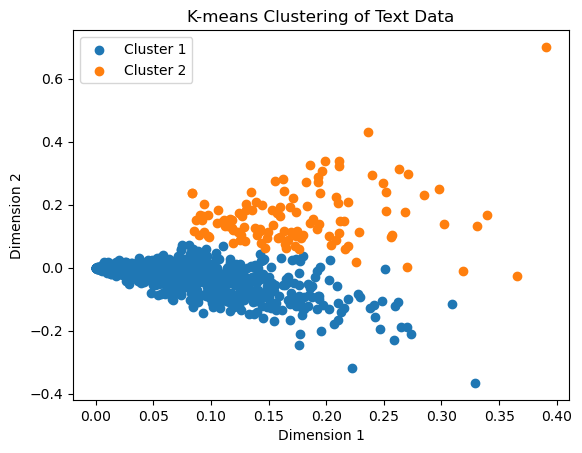

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



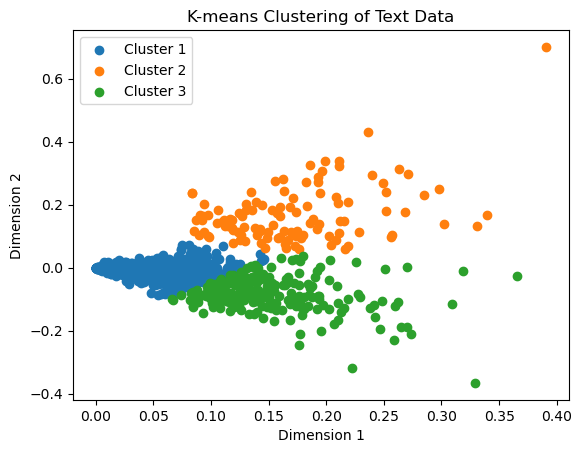

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



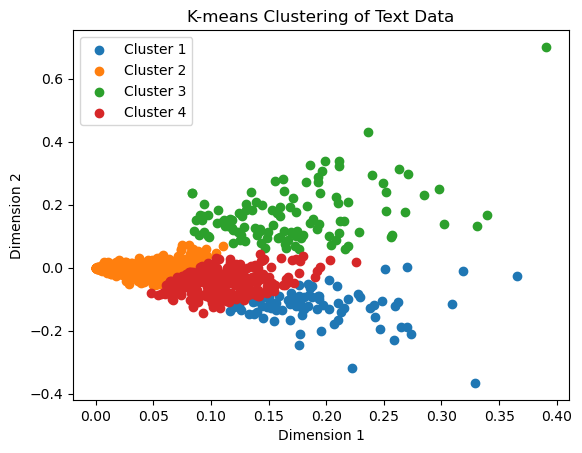

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



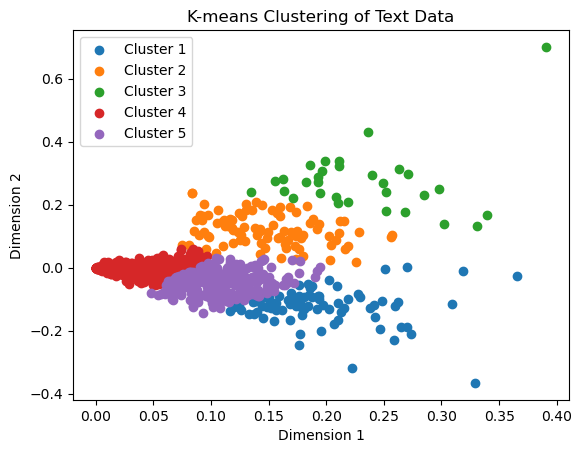

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



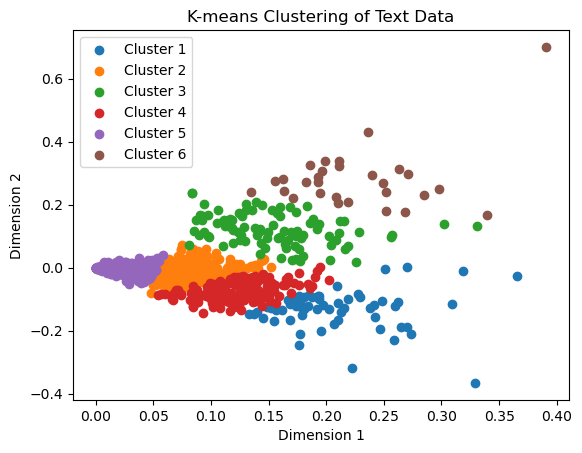

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



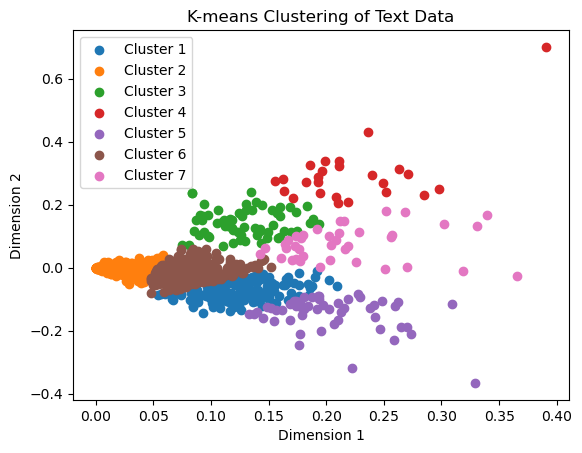

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



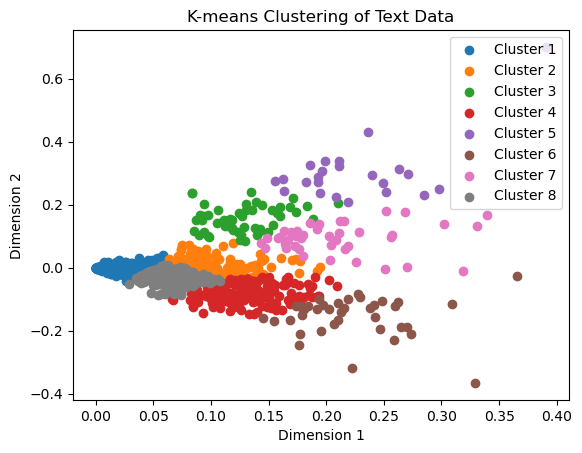

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



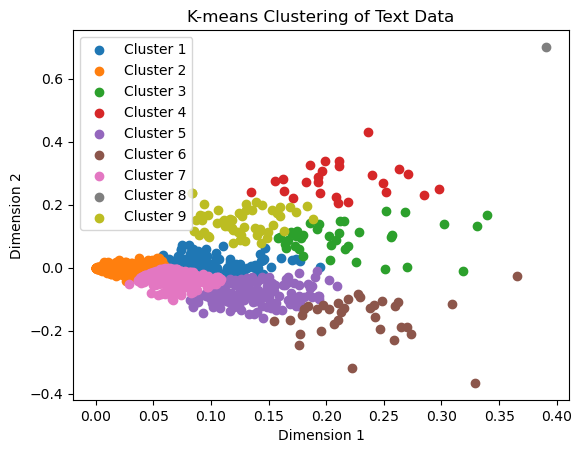

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



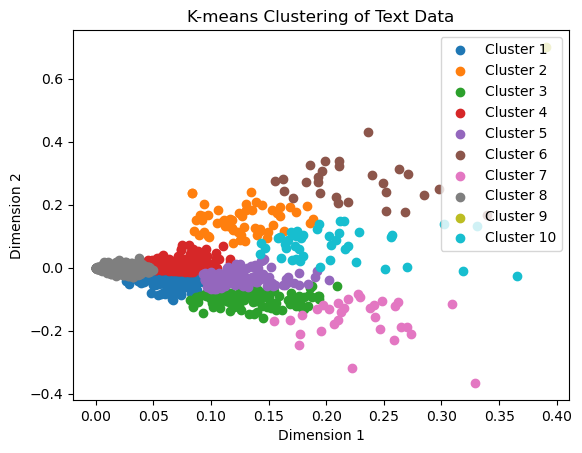

Current Time is: 14:19:25


In [94]:
# storing the current time in the variable
c = datetime.now()
# Displays Time
current_time = c.strftime('%H:%M:%S')
print('Current Time is:', current_time)

# Define a range of k values (number of clusters) to try
k_values = range(2, 11)

# Store the silhouette scores for each k
silhouette_scores = []

# Fit KMeans for each k value and compute silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(N_reduced)
    labels = kmeans.labels_

    # Plot clusters
    for i in range(k):
        cluster_texts = [sampleneg[j] for j in range(len(sampleneg)) if labels[j] == i]
        cluster_x = N_reduced[labels == i, 0]
        cluster_y = N_reduced[labels == i, 1]
        plt.scatter(cluster_x, cluster_y, label=f'Cluster {i + 1}')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('K-means Clustering of Text Data')
    plt.legend()
    plt.show()
    
    


# storing the current time in the variable
c = datetime.now()
# Displays Time
current_time = c.strftime('%H:%M:%S')
print('Current Time is:', current_time)

## Positive Clustering

Current Time is: 13:45:11


C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


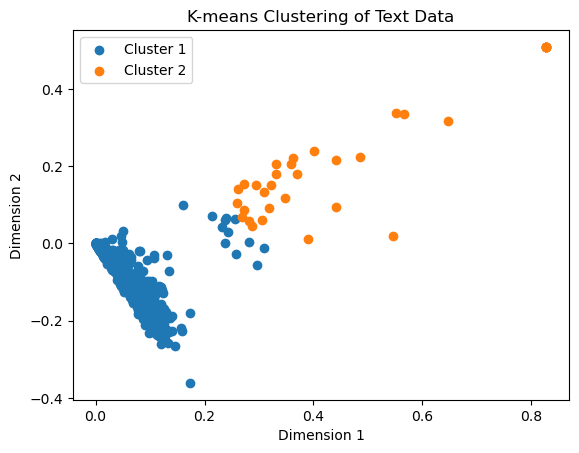

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


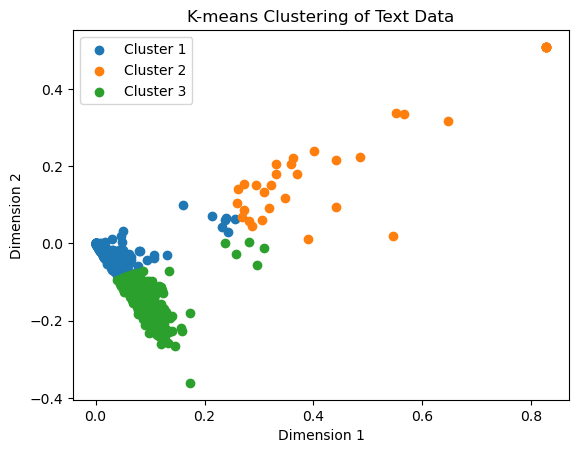

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


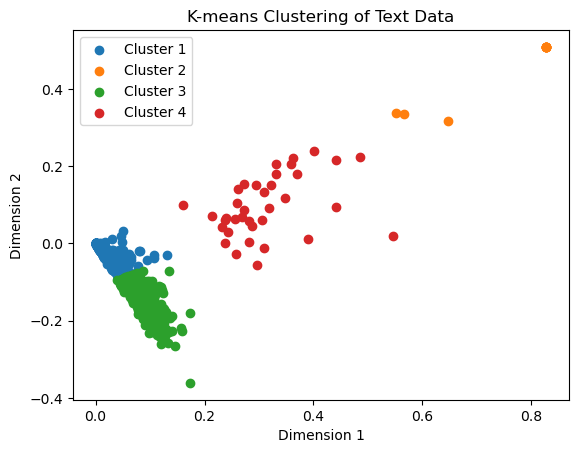

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


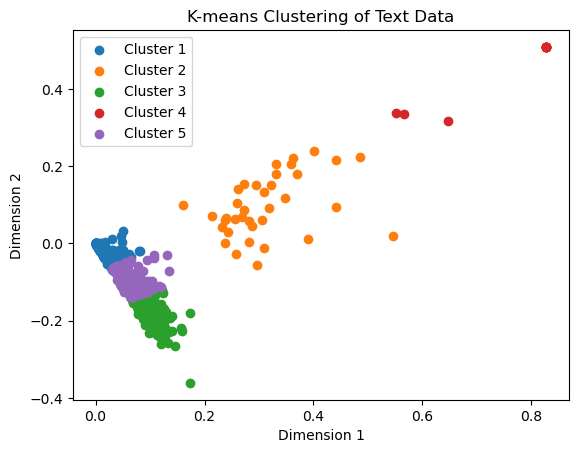

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


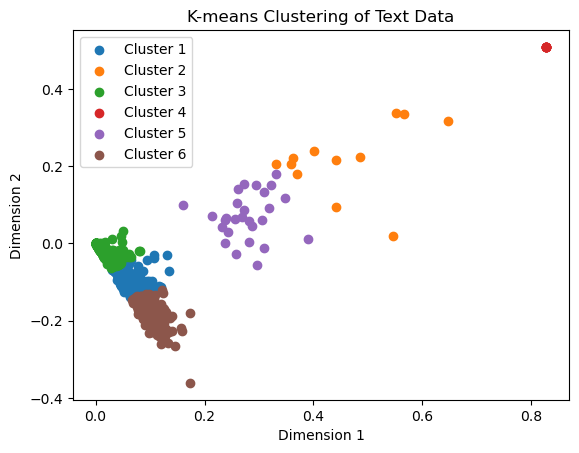

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


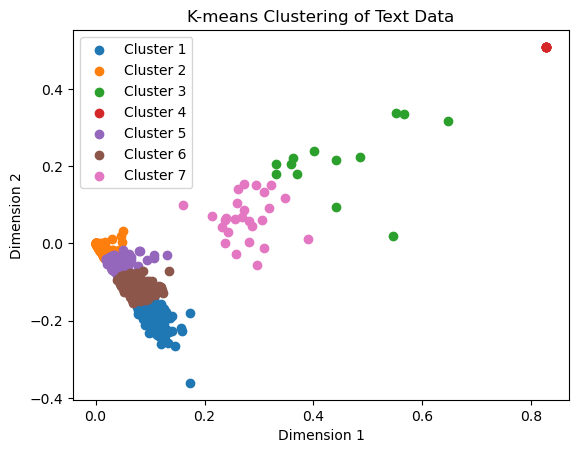

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


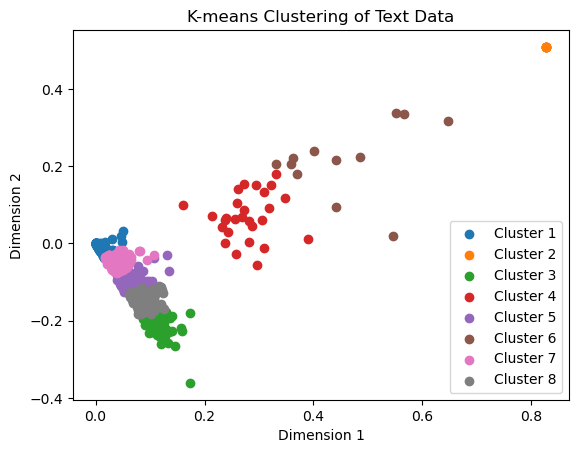

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


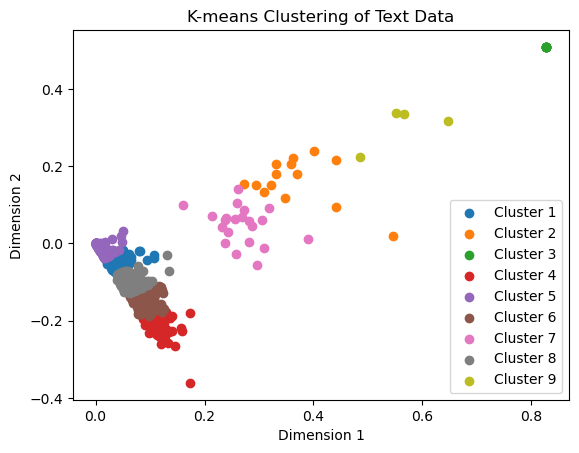

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


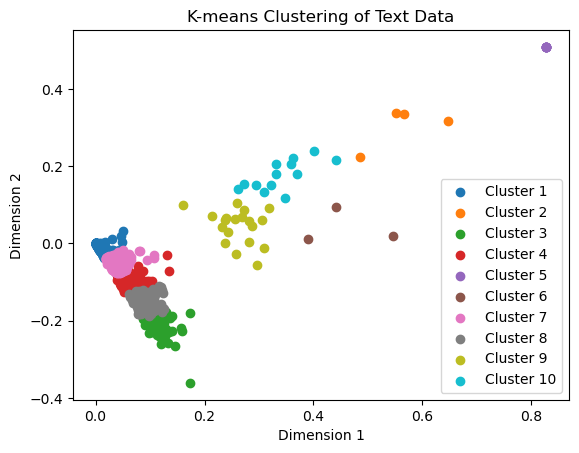

Current Time is: 13:45:18


In [68]:
# storing the current time in the variable
c = datetime.now()
# Displays Time
current_time = c.strftime('%H:%M:%S')
print('Current Time is:', current_time)

# Define a range of k values (number of clusters) to try
k_values = range(2, 11)

# Store the silhouette scores for each k
silhouette_scores = []

# Fit KMeans for each k value and compute silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(P_reduced)
    labels = kmeans.labels_

    # Plot clusters
    for i in range(k):
        cluster_texts = [samplepos[j] for j in range(len(samplepos)) if labels[j] == i]
        cluster_x = P_reduced[labels == i, 0]
        cluster_y = P_reduced[labels == i, 1]
        plt.scatter(cluster_x, cluster_y, label=f'Cluster {i + 1}')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('K-means Clustering of Text Data')
    plt.legend()
    plt.show()
    
    


# storing the current time in the variable
c = datetime.now()
# Displays Time
current_time = c.strftime('%H:%M:%S')
print('Current Time is:', current_time)

In [71]:
# Define a range of k values (number of clusters) to try
k_values = range(2, 11)

# Store the silhouette scores for each k
silhouette_scores = []

# Fit KMeans for each k value and compute silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(P_reduced)
    labels = kmeans.labels_

    # Create DataFrame with reduced dimensions and cluster labels
    cluster_data = pd.DataFrame(data=P_reduced, columns=['Dimension 1', 'Dimension 2'])
    cluster_data['Cluster'] = labels
    
    # Plot interactive scatter plot
    fig = px.scatter(cluster_data, x='Dimension 1', y='Dimension 2', color='Cluster',title=f'Interactive Scatter Plot of Clusters (k={k})')
    fig.show()

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tqz11\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



# Agglomerative Hierarchical Clustering Algorithm

Current Time is: 13:46:29


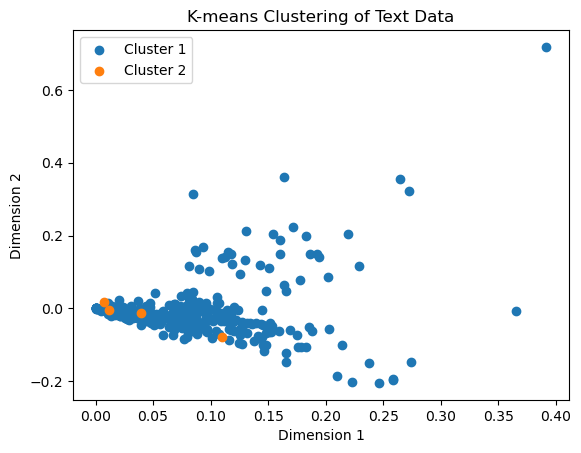

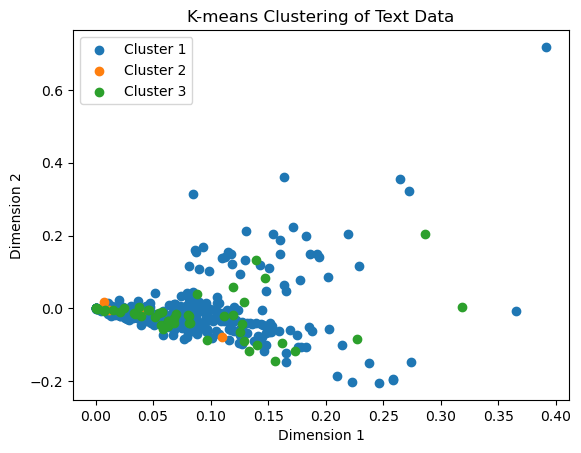

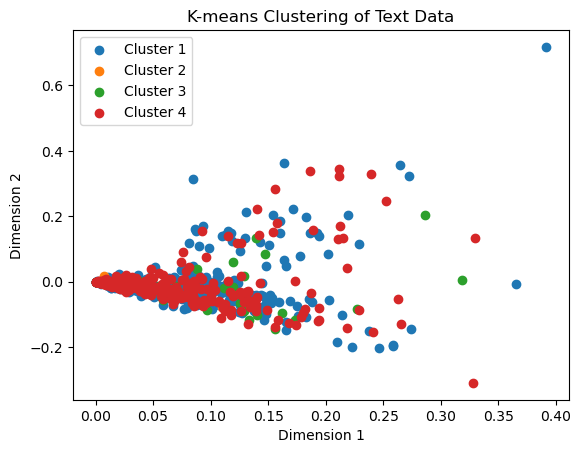

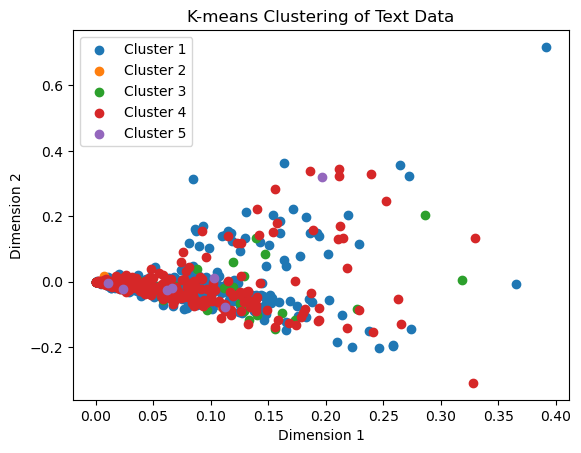

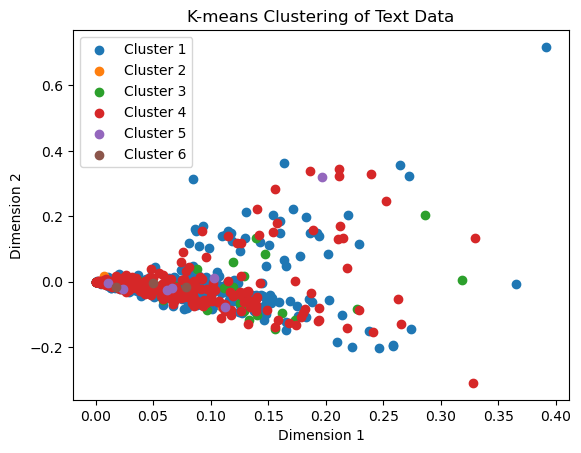

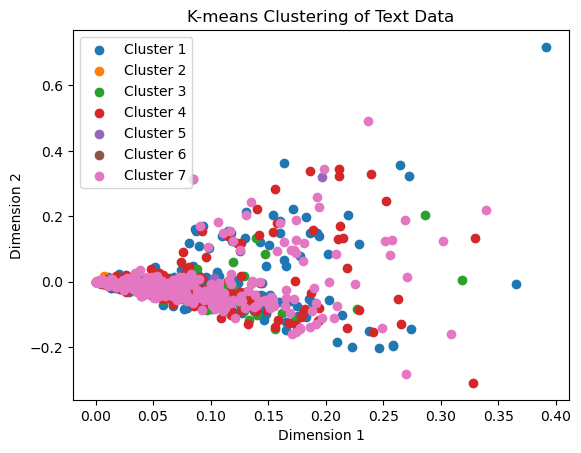

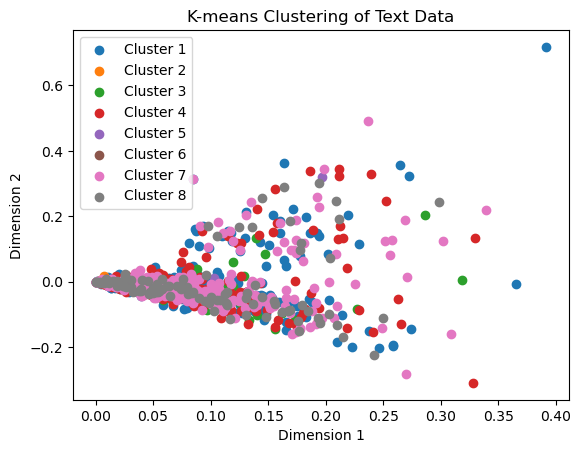

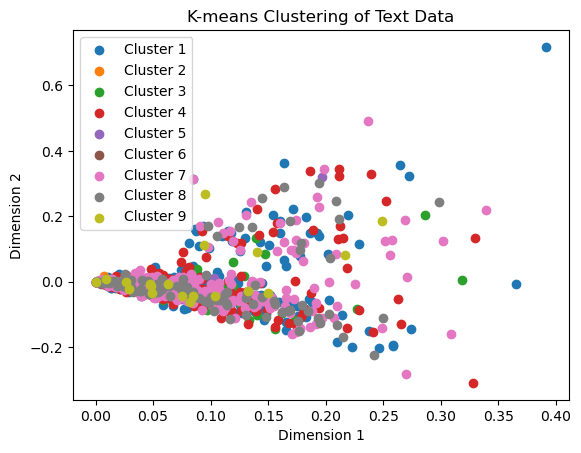

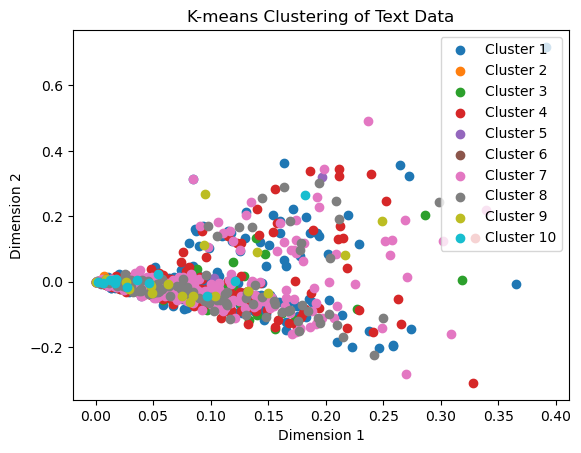

Current Time is: 13:46:32


In [72]:
# storing the current time in the variable
c = datetime.now()
# Displays Time
current_time = c.strftime('%H:%M:%S')
print('Current Time is:', current_time)

# Define a range of k values (number of clusters) to try
h_values = range(2, 11)

# Store the silhouette scores for each k
silhouette_scores = []

# Fit KMeans for each k value and compute silhouette score
for H in h_values:
    # Perform agglomerative clustering
    cluster = AgglomerativeClustering(n_clusters=H)
    cluster_labels = cluster.fit_predict(N_reduced)

    # Analyze sentiment within each cluster
    sid = SentimentIntensityAnalyzer()

    samplepos_list = samplepos.tolist()  # Convert samplepos to a list

    # Plot clusters
    for i in range(H):
        cluster_texts = [sampleneg[j] for j in range(len(sampleneg)) if labels[j] == i]
        cluster_x = N_reduced[labels == i, 0]
        cluster_y = N_reduced[labels == i, 1]
        plt.scatter(cluster_x, cluster_y, label=f'Cluster {i + 1}')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('K-means Clustering of Text Data')
    plt.legend()
    plt.show()
    
    


# storing the current time in the variable
c = datetime.now()
# Displays Time
current_time = c.strftime('%H:%M:%S')
print('Current Time is:', current_time)

Current Time is: 13:46:41


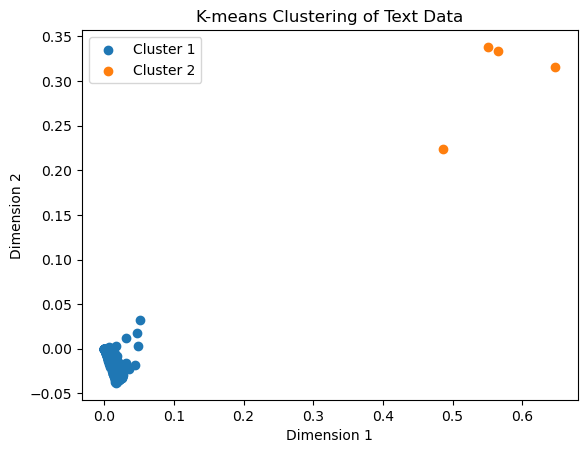

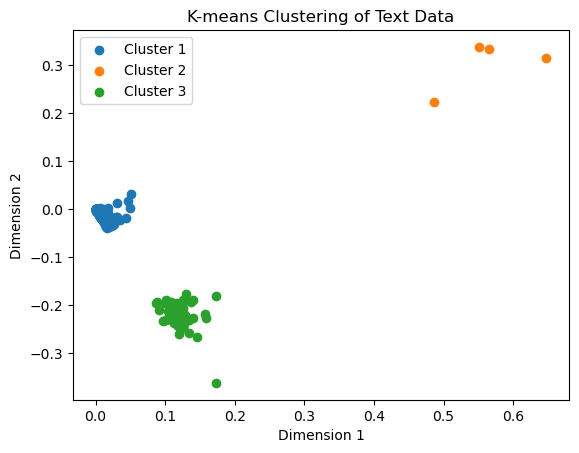

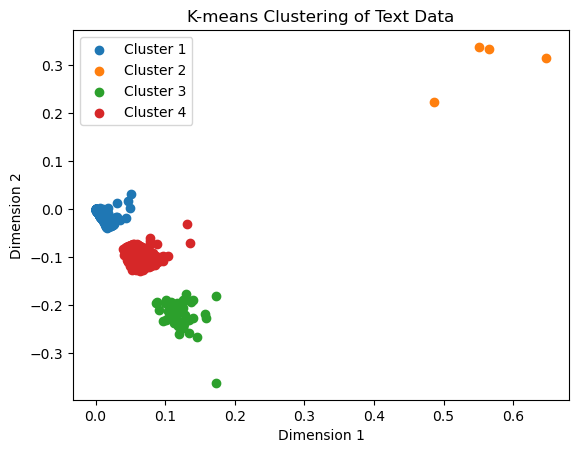

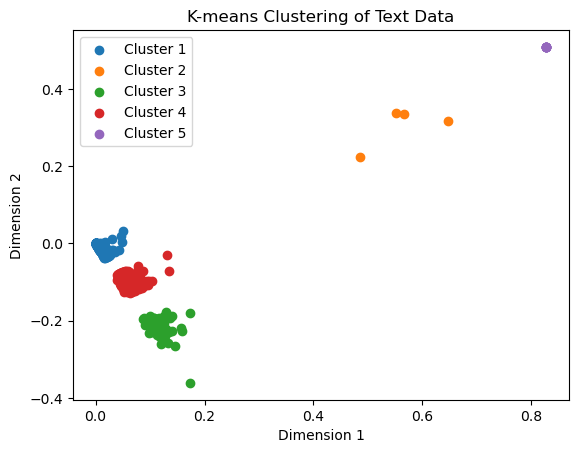

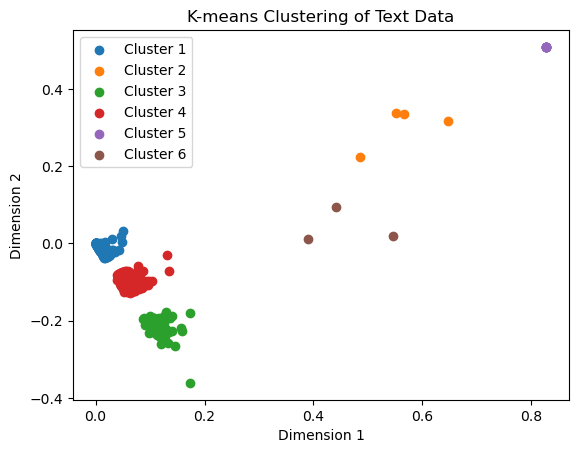

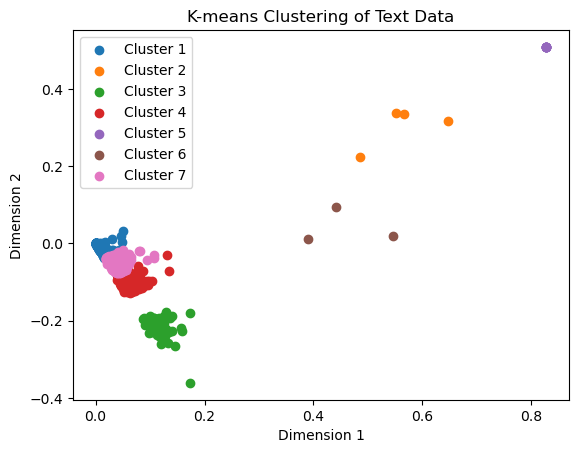

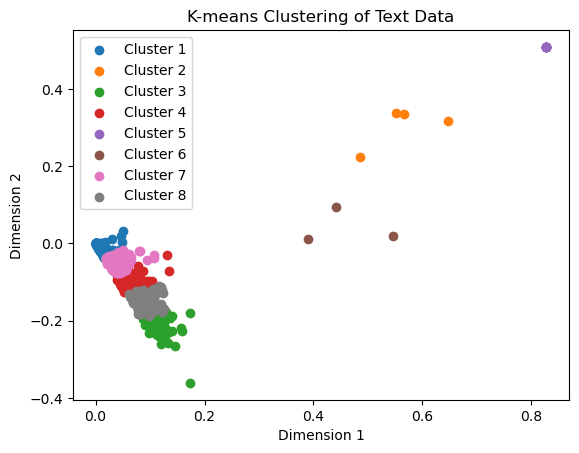

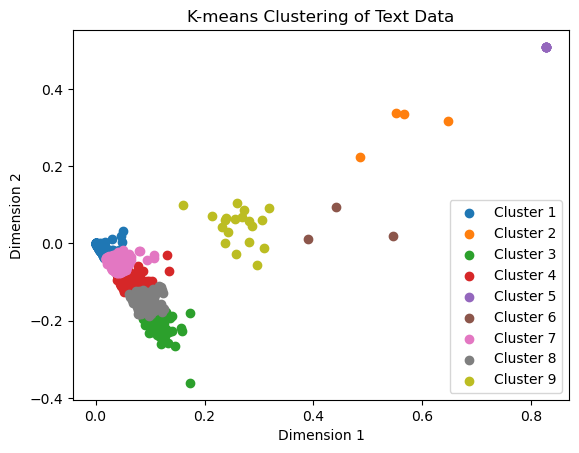

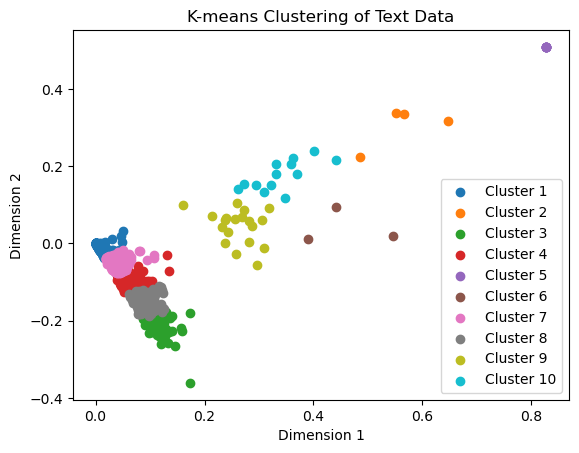

Current Time is: 13:46:44


In [73]:
# storing the current time in the variable
c = datetime.now()
# Displays Time
current_time = c.strftime('%H:%M:%S')
print('Current Time is:', current_time)

# Define a range of k values (number of clusters) to try
h_values = range(2, 11)

# Store the silhouette scores for each k
silhouette_scores = []

# Fit KMeans for each k value and compute silhouette score
for H in h_values:
    # Perform agglomerative clustering
    cluster = AgglomerativeClustering(n_clusters=H)
    cluster_labels = cluster.fit_predict(P_reduced)

    # Analyze sentiment within each cluster
    sid = SentimentIntensityAnalyzer()

    samplepos_list = samplepos.tolist()  # Convert samplepos to a list

    # Plot clusters
    for i in range(H):
        cluster_texts = [samplepos[j] for j in range(len(samplepos)) if labels[j] == i]
        cluster_x = P_reduced[labels == i, 0]
        cluster_y = P_reduced[labels == i, 1]
        plt.scatter(cluster_x, cluster_y, label=f'Cluster {i + 1}')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('K-means Clustering of Text Data')
    plt.legend()
    plt.show()
    
    


# storing the current time in the variable
c = datetime.now()
# Displays Time
current_time = c.strftime('%H:%M:%S')
print('Current Time is:', current_time)

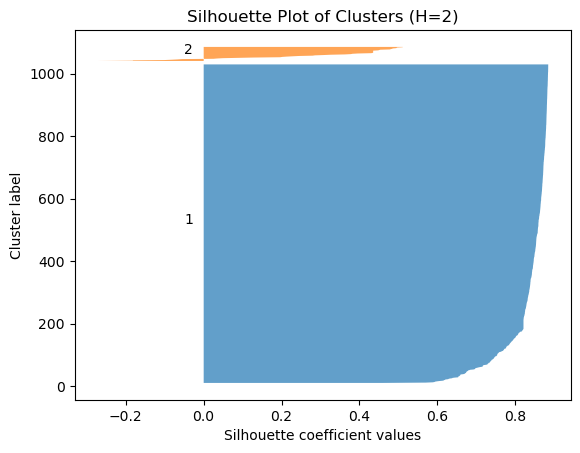

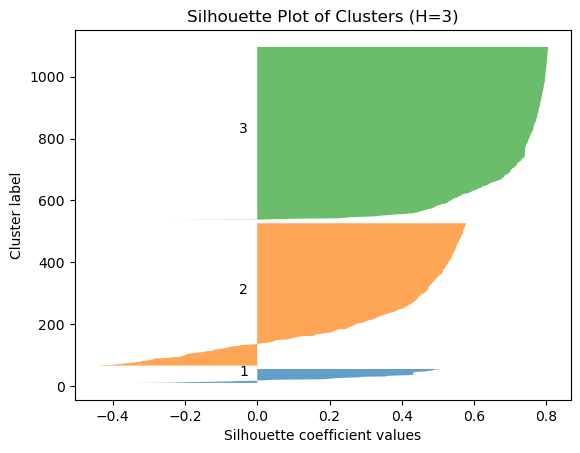

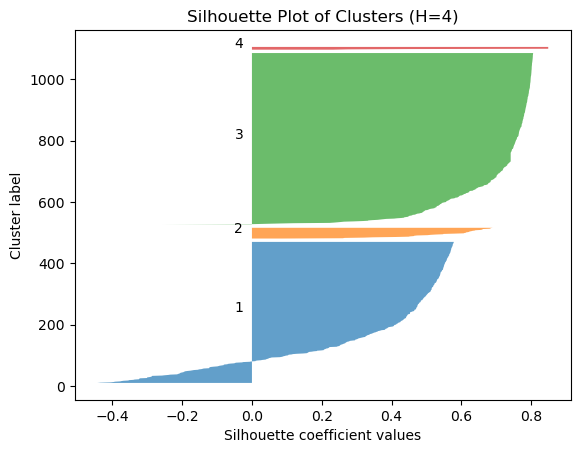

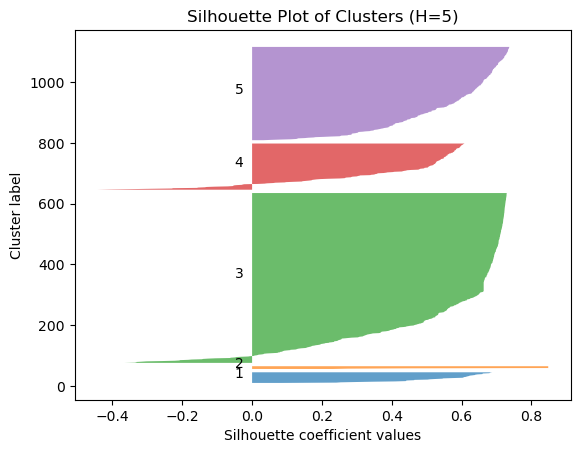

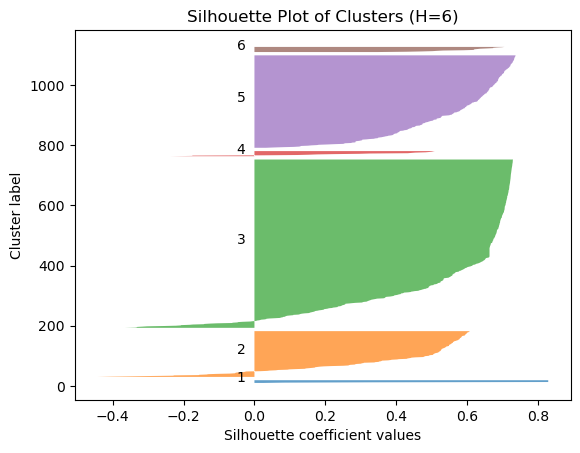

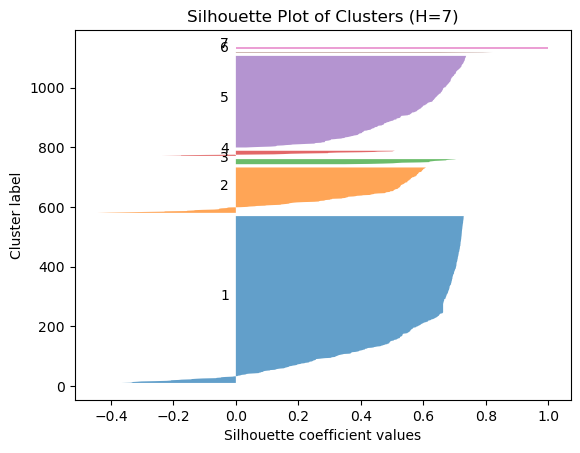

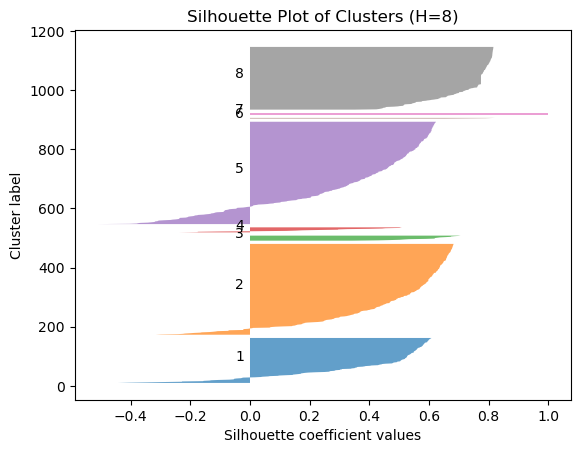

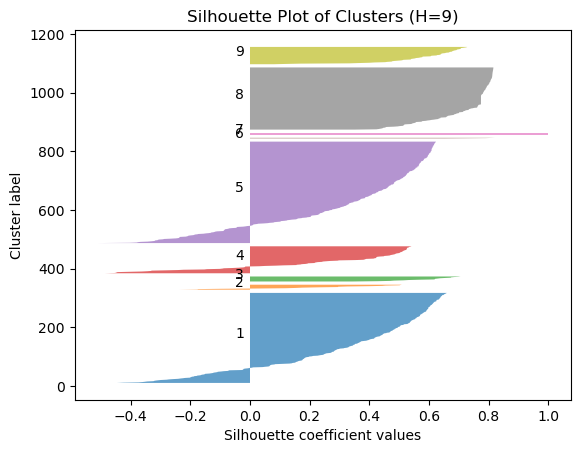

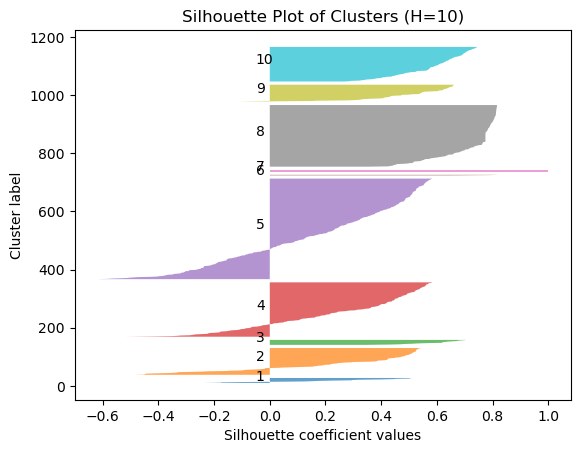

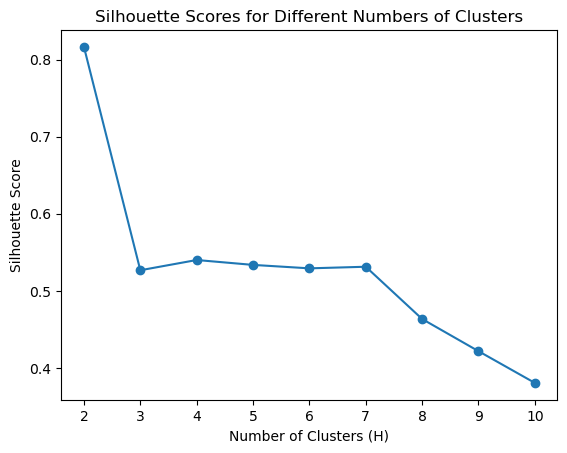

In [74]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# Define a range of k values (number of clusters) to try
h_values = range(2, 11)

# Store the silhouette scores for each k
silhouette_scores = []

# Fit AgglomerativeClustering for each k value and compute silhouette score
for H in h_values:
    # Perform agglomerative clustering
    cluster = AgglomerativeClustering(n_clusters=H)
    cluster_labels = cluster.fit_predict(P_reduced)

    # Compute silhouette score
    silhouette_avg = silhouette_score(P_reduced, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Compute silhouette values for each sample
    sample_silhouette_values = silhouette_samples(P_reduced, cluster_labels)

    # Plot silhouette plot
    y_lower = 10
    for i in range(H):
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        cluster_size = cluster_silhouette_values.shape[0]
        y_upper = y_lower + cluster_size
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i + 1))
        y_lower = y_upper + 10

    plt.title(f'Silhouette Plot of Clusters (H={H})')
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster label')
    plt.show()

# Plot silhouette scores
plt.plot(h_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (H)')
plt.ylabel('Silhouette Score')
plt.xticks(h_values)
plt.show()

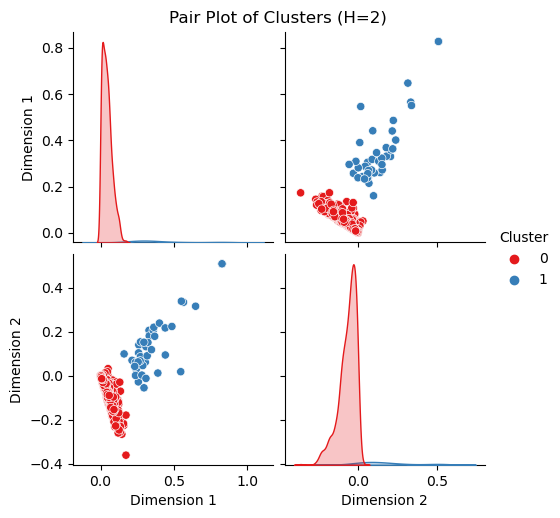

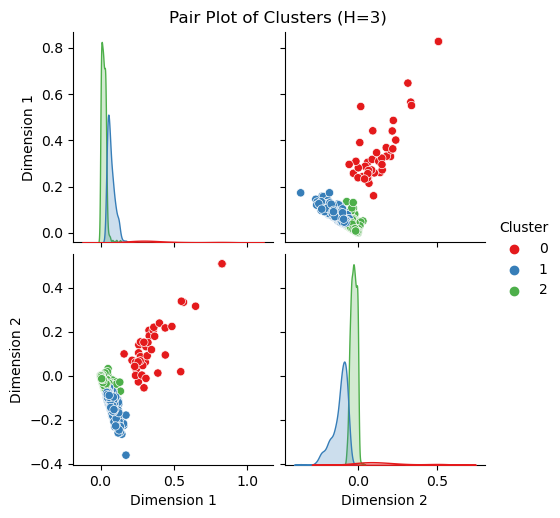

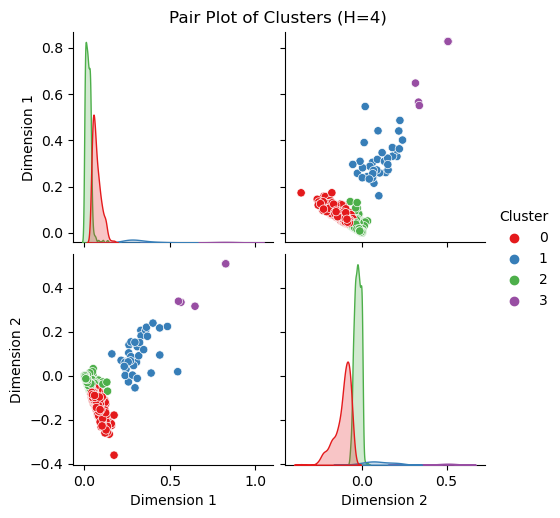

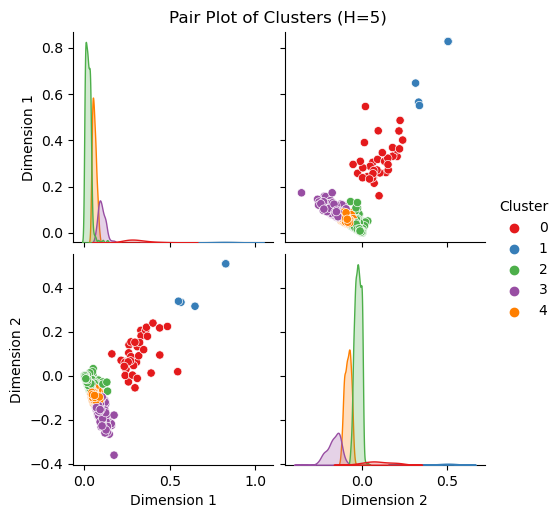

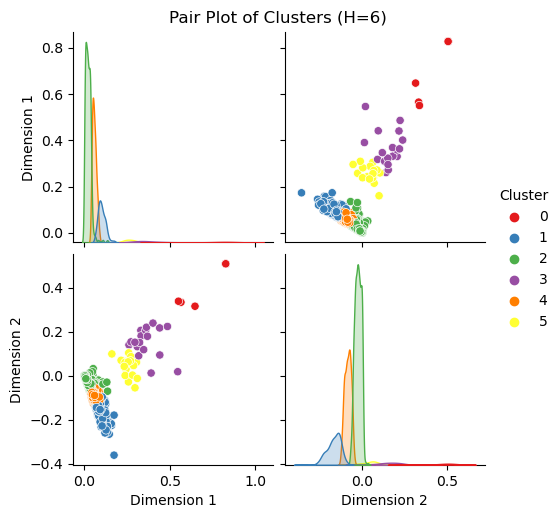

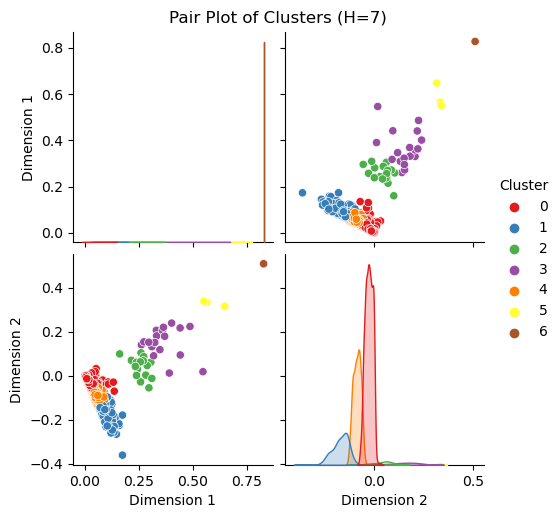

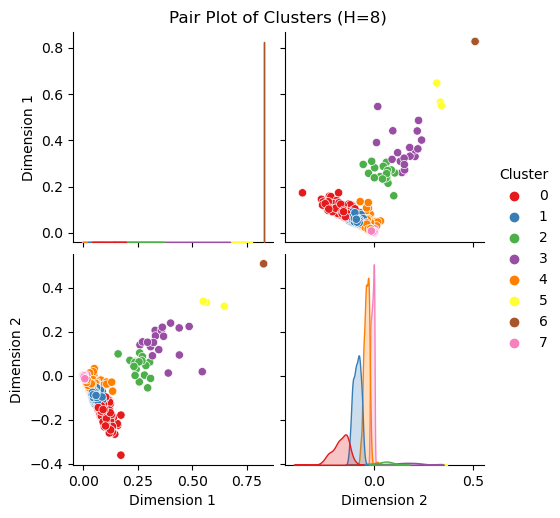

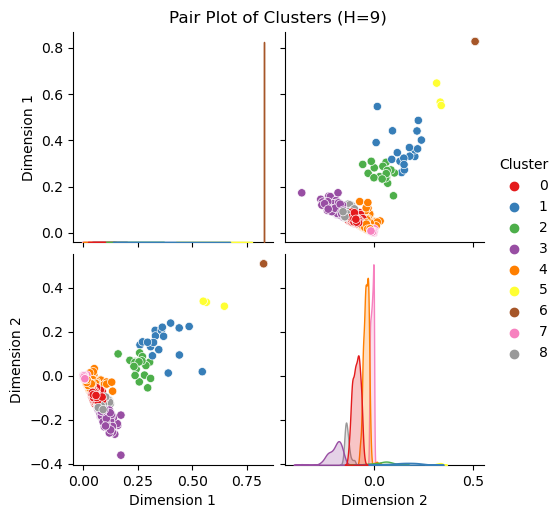

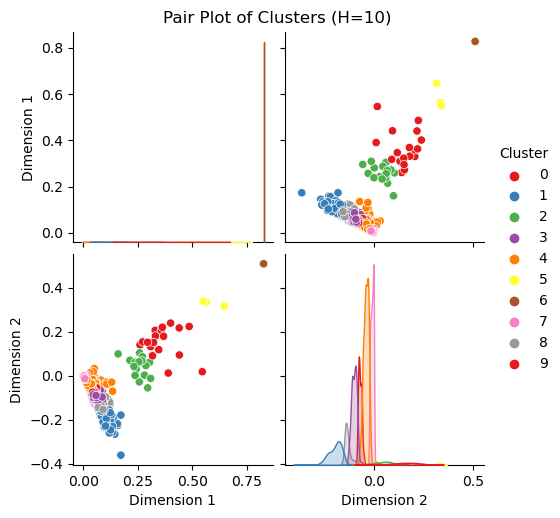

In [75]:
import seaborn as sns
import pandas as pd

# Define a range of k values (number of clusters) to try
h_values = range(2, 11)

# Fit AgglomerativeClustering for each k value and compute silhouette score
for H in h_values:
    # Perform agglomerative clustering
    cluster = AgglomerativeClustering(n_clusters=H)
    cluster_labels = cluster.fit_predict(P_reduced)

    # Create a DataFrame with reduced dimensions and cluster labels
    cluster_data = pd.DataFrame(data=P_reduced, columns=['Dimension 1', 'Dimension 2'])
    cluster_data['Cluster'] = cluster_labels

    # Plot pair plot
    sns.pairplot(cluster_data, hue='Cluster', palette='Set1')
    plt.suptitle(f'Pair Plot of Clusters (H={H})', y=1.02)
    plt.show()


In [76]:
# Define a range of k values (number of clusters) to try
h_values = range(2, 11)

# Fit AgglomerativeClustering for each k value and compute silhouette score
for H in h_values:
    # Perform agglomerative clustering
    cluster = AgglomerativeClustering(n_clusters=H)
    cluster_labels = cluster.fit_predict(P_reduced)

    # Create DataFrame with reduced dimensions and cluster labels
    cluster_data = pd.DataFrame(data=P_reduced, columns=['Dimension 1', 'Dimension 2'])
    cluster_data['Cluster'] = cluster_labels

    # Plot interactive scatter plot
    fig = px.scatter(cluster_data, x='Dimension 1', y='Dimension 2', color='Cluster',
                     title=f'Interactive Scatter Plot of Clusters (H={H})')
    fig.show()

# Word Cloud

In [78]:
# Combine the text for the Word Cloud
wordcloud_text = data_Neg1.str.cat(sep=' ')
# Size of Word Cloud # (max_font_size = 100, max_words = 50,)
plt.rcParams["figure.figsize"] = (15,15)
# This use to import image and apply to the Word Cloud
custom_mask = np.array(Image.open('twitter_wordcloud.png'))
# Make Wordcloud
wordcloud = WordCloud(background_color = "white", colormap = 'plasma', mask = custom_mask).generate(wordcloud_text)

# Plot Wordcloud
plt.plot()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

TypeError: Cannot use .str.cat with values of inferred dtype 'mixed'.

In [ ]:
res = collections.Counter(wordcloud_text.split())
res_mostcommon = res.most_common(10)
res_mostcommon

In [ ]:
values, counts = zip(*res_mostcommon)
values2,counts2 = zip(*res.most_common(100))

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Create a radar chart
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=counts,
      theta=values,
      fill='toself',
      name='Word'
))
# Add title
fig.update_layout(title='Radar Chart', width=800, height=800)
# Show the plot
fig.show()

In [ ]:


plt.bar(values, counts, color ='maroon', 
        width = 0.4)

plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=values,
        y=counts
    ))

fig.add_trace(
    go.Bar(
        x=values,
        y=counts
    ))

fig.show()

In [ ]:
# Calculate sentiment polarity for each comment
data_sentiment = data.apply(lambda x: TextBlob(x).sentiment.polarity)



# Assuming data_sentiment is a
# Create the KDE object
data_density = kde.gaussian_kde(data_sentiment)

# Generate points for the density curve
x = np.linspace(data_sentiment.min(), data_sentiment.max(), 100)
density = data_density(x)

plt.plot(x, density, label='Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.title('Sentiment Distribution in data_sentiment')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Generate bigrams from the 'text' column of the DataFrame
bigrams = list(ngrams(data2, 2))
bigram_counts = Counter(bigrams)

# Get the top 5 most common bigrams
top_5_bigrams = bigram_counts.most_common(5)

# Create a new graph
G = nx.Graph()

# Add edges with weights for all bigrams
for bigram, count in bigram_counts.items():
    G.add_edge(bigram[0], bigram[1], weight=count)

# Extract just the bigrams from the top 10 for highlighting
top_bigrams = [bigram for bigram, count in top_5_bigrams]

# Set node sizes based on whether the bigram is in the top 5
node_sizes = [1000 if node in top_bigrams else 100 for node in G.nodes()]

# Explicitly create a figure and axes object
plt.figure(figsize=(12, 8))  # Optional: specify the size of the figure
ax = plt.gca()  # Get the current axes

# Draw the graph with highlighted nodes for the top 5 bigrams
pos = nx.spring_layout(G)  # Positioning of nodes
nx.draw(G, pos, ax=ax, node_color='lightblue', node_size=node_sizes, with_labels=True)

# Finally, display the plot
plt.show()

